<a href="https://colab.research.google.com/github/anslemhuncho/MACHINE-LEARNING-PROJECT/blob/main/Best_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/15
132/132 [==============================] - 2206s 17s/step - loss: 6.1040 - accuracy: 0.2056 - val_loss: 3.6897 - val_accuracy: 0.0715 - lr: 1.0000e-04
Epoch 2/15
132/132 [==============================] - 63s 478ms/step - loss: 0.9544 - accuracy: 0.7380 - val_loss: 4.0813 - val_accuracy: 0.0691 - lr: 1.0000e-04
Epoch 3/15
132/132 [==============================] - 62s 469ms/step - loss: 0.2168 - accuracy: 0.9353 - val_loss: 3.3523 - val_accuracy: 0.1387 - lr: 1.0000e-04
Epoch 4/15
132/132 [==============================] - 63s 477ms/step - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.3187 - val_accuracy: 0.9135 - lr: 1.0000e-04
Epoch 5/15
132/132 [==============================] - 63s 477ms/step - loss: 0.0198 - accuracy: 0.9943 - val_loss: 0.0646 - val_accuracy: 0.9870 - lr: 1.0000e-04
Epoch 6/15
132/132 [==============================] - 63s 476ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0531 - val_accuracy: 0.9884 - lr: 1.0000e-04
Epoch 7/15
132/132 [========

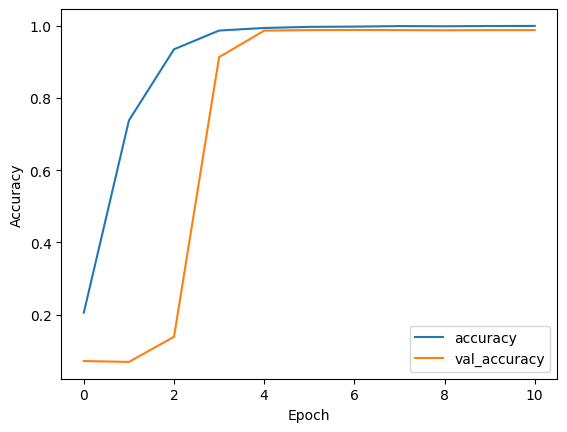

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Custom dataset class
class CustomDataset(tf.keras.utils.Sequence):
    def __init__(self, directory, batch_size=32, target_size=(254, 254), shuffle=True):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle

        self.classes = sorted(os.listdir(directory))
        self.num_classes = len(self.classes)
        self.class_to_index = {cls: idx for idx, cls in enumerate(self.classes)}

        self.image_paths = []
        for cls in self.classes:
            cls_dir = os.path.join(directory, cls)
            cls_images = [os.path.join(cls_dir, img) for img in os.listdir(cls_dir)]
            self.image_paths.extend(cls_images)

        self.indexes = np.arange(len(self.image_paths))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.ceil(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
        batch_paths = [self.image_paths[i] for i in batch_indexes]

        batch_images = []
        batch_labels = []
        for path in batch_paths:
            image = load_img(path, target_size=self.target_size)
            image_array = img_to_array(image) / 255.0  # Normalize pixel values
            batch_images.append(image_array)

            label = os.path.basename(os.path.dirname(path))
            label_index = self.class_to_index[label]
            batch_labels.append(label_index)

        batch_images = np.array(batch_images)
        batch_labels = to_categorical(batch_labels, num_classes=self.num_classes)

        return batch_images, batch_labels

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

# Define paths to your train and test folders
train_dir = '/content/drive/MyDrive/Normalised data/train'
test_dir = '/content/drive/MyDrive/Normalised data/test'

# Set up custom data generators
train_dataset = CustomDataset(train_dir, batch_size=32, target_size=(254, 254), shuffle=True)
test_dataset = CustomDataset(test_dir, batch_size=32, target_size=(254, 254), shuffle=False)

# Define the CNN model architecture with an Input layer
model = Sequential([
    Input(shape=(254, 254, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(512),
    LeakyReLU(),  # Using LeakyReLU activation
    Dropout(0.5),
    Dense(train_dataset.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Implement callbacks for early stopping and learning rate reduction
callbacks = [
    EarlyStopping(patience=5, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3, min_lr=1e-6, verbose=1)
]

# Train the model
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=test_dataset,  # Use test dataset for validation
    callbacks=callbacks
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Save the model
model.save('/content/drive/MyDrive/Normalised data')

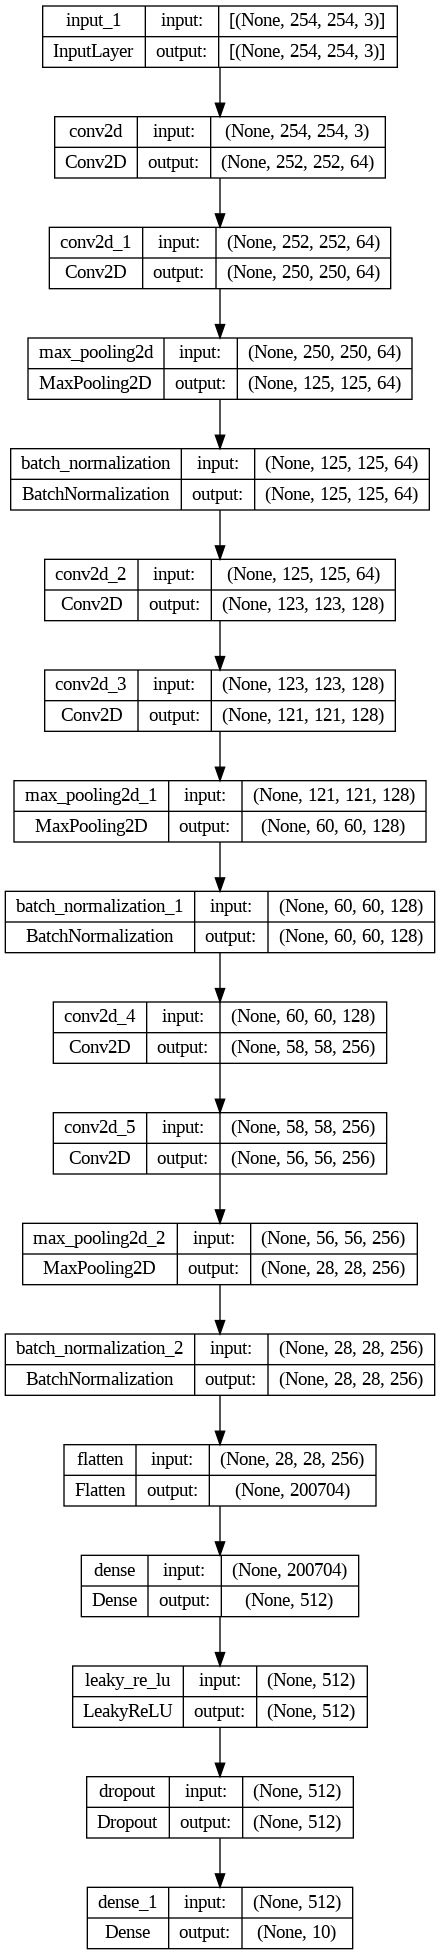

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot model summary as a graph
plot_model(model, to_file='model_summary.png', show_shapes=True, show_layer_names=True)


65/65 [==============================] - 12s 178ms/step


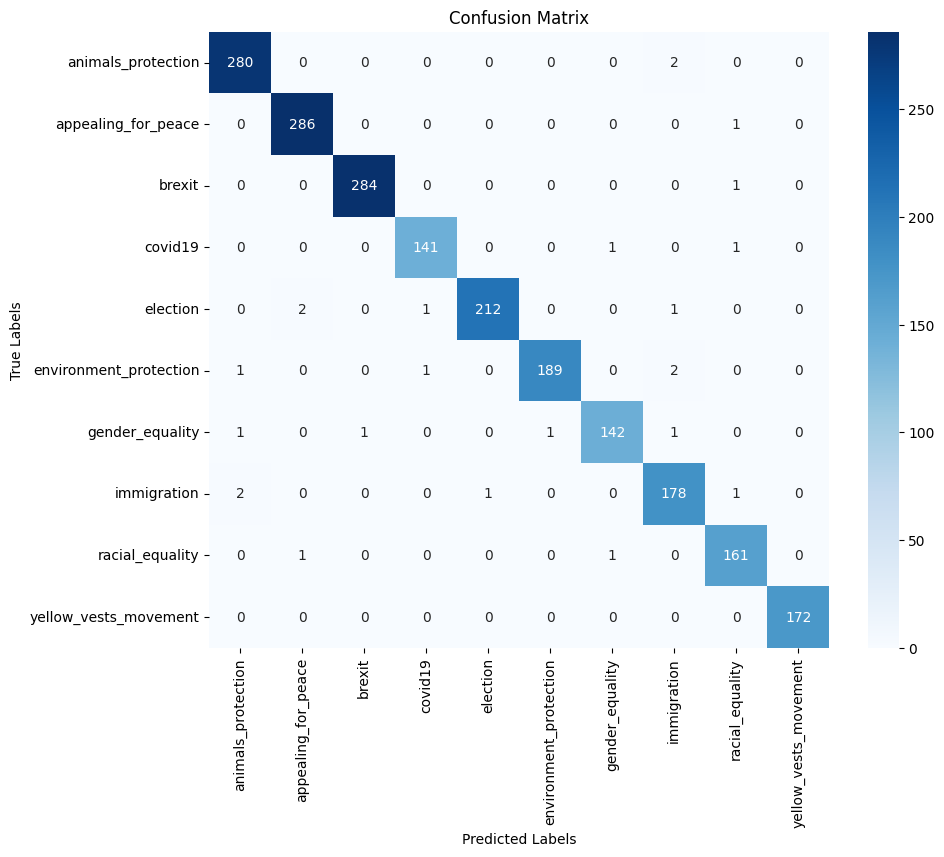


Classification Report:
                        precision    recall  f1-score   support

    animals_protection       0.99      0.99      0.99       282
   appealing_for_peace       0.99      1.00      0.99       287
                brexit       1.00      1.00      1.00       285
               covid19       0.99      0.99      0.99       143
              election       1.00      0.98      0.99       216
environment_protection       0.99      0.98      0.99       193
       gender_equality       0.99      0.97      0.98       146
           immigration       0.97      0.98      0.97       182
       racial_equality       0.98      0.99      0.98       163
 yellow_vests_movement       1.00      1.00      1.00       172

              accuracy                           0.99      2069
             macro avg       0.99      0.99      0.99      2069
          weighted avg       0.99      0.99      0.99      2069



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict classes for the test dataset
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(np.concatenate([y for x, y in test_dataset]), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Get class labels
class_labels = train_dataset.classes

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate additional metrics
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("\nClassification Report:")
print(report)


In [ ]:
!pip install shap

In [ ]:
!pip install innvestigate

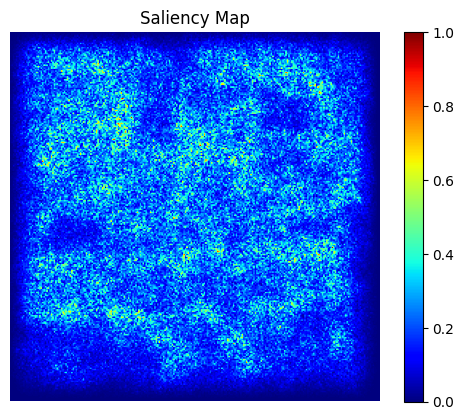

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

def generate_saliency_map(model, img_path, target_size=(254, 254)):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0) / 255.0  # Convert to float32
    img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)  # Convert to TensorFlow tensor

    # Compute gradients of the predicted class score with respect to the input image
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        preds = model(img_array)
        class_idx = tf.argmax(preds[0])
        output = preds[:, class_idx]

    # Get gradients of the predicted class score with respect to the input image
    grads = tape.gradient(output, img_array)[0]

    # Convert gradients to absolute values
    grads = tf.abs(grads)

    # Normalize gradients
    grads /= tf.reduce_max(grads)

    # Convert gradients to numpy array
    grads = grads.numpy()

    # Saliency map is the max across channels for each pixel
    saliency_map = np.max(grads, axis=-1)

    # Resize saliency map to match the original image size
    saliency_map = cv2.resize(saliency_map, target_size)

    return saliency_map

# Load the saved model
saved_model_path = '/content/drive/MyDrive/Normalised data/saved_model'
loaded_model = tf.keras.models.load_model(saved_model_path)

# Provide a sample image path
sample_img_path = '/content/drive/MyDrive/Normalised data/train/appealing_for_peace/026775b592e89f832d3c8e75e3c48a061d30cea3.jpg'

# Generate saliency map for the sample image
saliency_map = generate_saliency_map(loaded_model, sample_img_path)

# Plot the saliency map
plt.imshow(saliency_map, cmap='jet')
plt.title('Saliency Map')
plt.axis('off')
plt.colorbar()
plt.show()


the yellow regions represent areas that were significant to the models performance.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
